Il ruolo dell'attaccante è fondamentale nel gioco del calcio. E' compito suo infatti fare gol ma non solo, è anche un'ottima chiave di gioco per la creazione degli spazi utili per i compagni di squadra o anche per difendere il pallone in una zona di campo lontana dalla propria area e permettere così al team di rifiatare e alzare il baricentro. In questa sezione ci occupiamo della parte 'demografica' degli attaccanti di Serie A. Andremo ad analizzare come sono distribuite le età, le nazionalità ed i minuti giocati, per gli attaccanti. 

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import scipy.stats as stats
import tensorflow as tf
import funzioni
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib.widgets import Slider

pd.set_option('display.max_columns', None)

# Elenco dei file da leggere
files = ['attaccanti_23.xlsx', 'attaccanti_22.xlsx', 'attaccanti_21.xlsx', 'attaccanti_20.xlsx', 'attaccanti_19.xlsx']

# Dizionario per mappare i file agli anni
year_mapping= {'attaccanti_23.xlsx': 2023,'attaccanti_22.xlsx': 2022,'attaccanti_21.xlsx': 2021,'attaccanti_20.xlsx': 2020,
                'attaccanti_19.xlsx': 2019}

In [24]:
import importlib
import funzioni
importlib.reload(funzioni)

<module 'funzioni' from 'c:\\Users\\milan\\OneDrive\\Desktop\\git shared\\Pytone\\ATTACCANTI\\funzioni.py'>

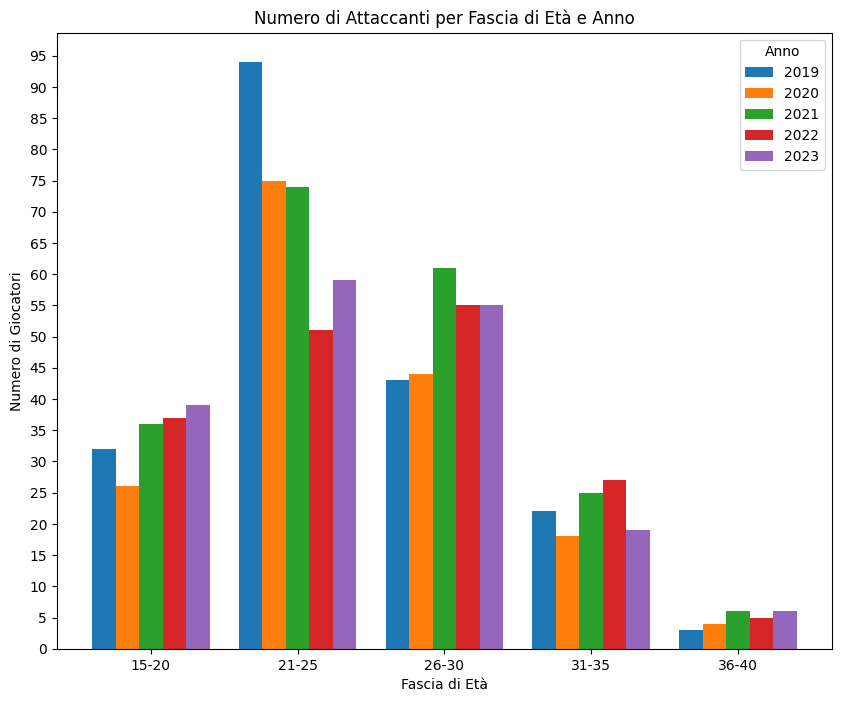

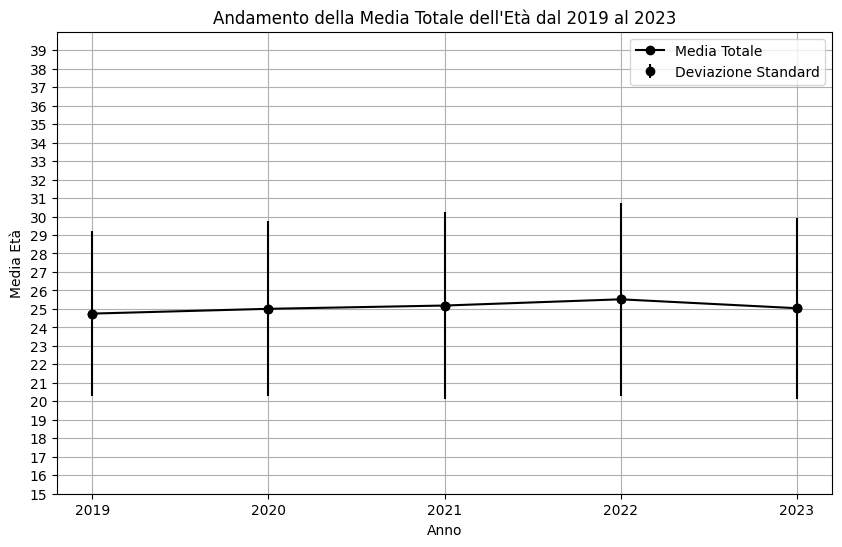

In [25]:
# Definizione delle fasce di età e le etichette
bins = [15, 20, 25, 30, 35, 40]
labels = ['15-20', '21-25', '26-30', '31-35', '36-40']

# Dizionario per conservare i conteggi annuali per ciascuna fascia d'età
fasce_eta_conti = {label: [] for label in labels}
medie_totali_annuali = []
deviazioni_annuali = []

# Ciclo sui file per calcolare la numerosità per ciascuna fascia, la media totale e la deviazione standard
for file in files:
    data = pd.read_excel(file)
    eta = data['Age']

    # Categorizzazione delle età nelle fasce specificate
    eta_bins = pd.cut(eta, bins=bins, labels=labels, right=True, include_lowest=True)

    # Conteggio il numero di giocatori per ciascuna fascia di età
    for label in labels:
        conteggio_eta_fascia = (eta_bins == label).sum()
        fasce_eta_conti[label].append(conteggio_eta_fascia)

    # Calcolo media e deviazione standard
    medie_totali_annuali.append(eta.mean())
    deviazioni_annuali.append(eta.std(ddof=1))  # Deviazione standard campionaria

anni = ['2019', '2020', '2021', '2022', '2023']  

# Creazione del grafico a barre (numerosità per fascia di età e anno)
fig, ax = plt.subplots(figsize=(10, 8))
mini_bar_width = 0.8 / len(anni)  # Calcolo larghezza barre 
x_pos = np.arange(len(labels))

for i, anno in enumerate(anni):
    conti_annuali = [fasce_eta_conti[label][i] for label in labels]
    offset = (i - (len(anni) - 1) / 2) * mini_bar_width
    ax.bar(x_pos + offset, conti_annuali, mini_bar_width, label=anno)

ax.set_xlabel('Fascia di Età')
ax.set_ylabel('Numero di Giocatori')
ax.set_title('Numero di Attaccanti per Fascia di Età e Anno')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.legend(title='Anno')

ax.set_yticks(np.arange(0, max(max(fasce_eta_conti.values())) + 5, 5))

plt.show()

# Creazione secondo grafico
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(anni, medie_totali_annuali, marker='o', color='k', label='Media Totale')

# Aggiungo barre di errore
ax.errorbar(anni, medie_totali_annuali, yerr=deviazioni_annuali, fmt='o', color='k', label='Deviazione Standard')

ax.set_xlabel('Anno')
ax.set_ylabel('Media Età')
ax.set_title("Andamento della Media Totale dell'Età dal 2019 al 2023")

ax.set_ylim(15, 40)
ax.set_yticks(np.arange(15, 40, 1))

ax.grid(True)
ax.legend()

plt.show()


Dopo aver importato i file necessari andiamo ad analizzare come sono variate le età nei 5 anni analizzati, visualizziamo il tutto con una serie di istogrammi riferiti alle varie fasce di età. Si nota come il valore compreso tra i 21 e i 25 anni sia il più diffuso nel ruolo, seguito da 26-30 e 15-20. Il reparto offensivo risulta quindi relativamente giovane, e il dato si conferma sempre nei 5 anni. Da tenere in considerazione inoltre l'aumento progressivo dell'utilizzo sempre maggiore di giovanissimi, i quali vengono fatti esordire molto prematuramente. Dal 2020 al 2023 infatti il dato è in costante aumento, e ciò si conferma anche con i discorsi molto ripresi nel corso di questi anni, dove la maggior parte delle squadre di Serie A provano a ringiovanire l'organico e a ricercare sempre più giovani talenti da valorizzare e rivendere ad un prezzo maggiore.
Il secondo grafico, riferito alla media di età nel corso degli anni, si nota una error bar notevole, che dipende proprio dalle grandi differenze di età che si possono trovare nel parco attaccanti.

Passiamo ora all'analisi delle nazionalità. Vediamo quali sono le nazionalità più presenti in Serie A utilizzando il concept precedente, in modo da avere un confronto diretto anno per anno.

In [ ]:
# Lettura dei dati e conteggio delle nazionalità per ciascun anno
all_counts = {}
for file in files:
    data = pd.read_excel(file)
    year = year_mapping[file]
    nazionalita_counts = data['Nation'].value_counts()
    all_counts[year] = nazionalita_counts

# Unione dei dati in un DataFrame
df_counts = pd.DataFrame(all_counts).fillna(0)

# Creazione di un grafico a barre
fig = go.Figure()

for year in df_counts.columns:
    fig.add_trace(go.Bar( x=df_counts.index, y=df_counts[year], name=str(year)))

# Barra di scorrimento così da favorire la visualizzazione
fig.update_layout(
    title="Distribuzione delle Nazionalità degli attaccanti per gli anni 2019-2023",
        xaxis=dict(title="Nazionalità", tickangle=45, automargin=True,rangeslider=dict(visible=True) ),   
    
        yaxis=dict( title="Numero di calciatori", tick0=0, dtick=5),
    barmode='group',      
    width=2000            
)

fig.show()

Come da aspettativa, la nazionalità italiana risulta nettamente la più diffusa, questo appunto per via del campionato preso in esame. Risultano sorprendenti invece i dati relativi ad Argentina, Brasile e Costa d'Avorio, le quali hanno un indice molto alto e distaccato rispetto alle altre nazionalità.

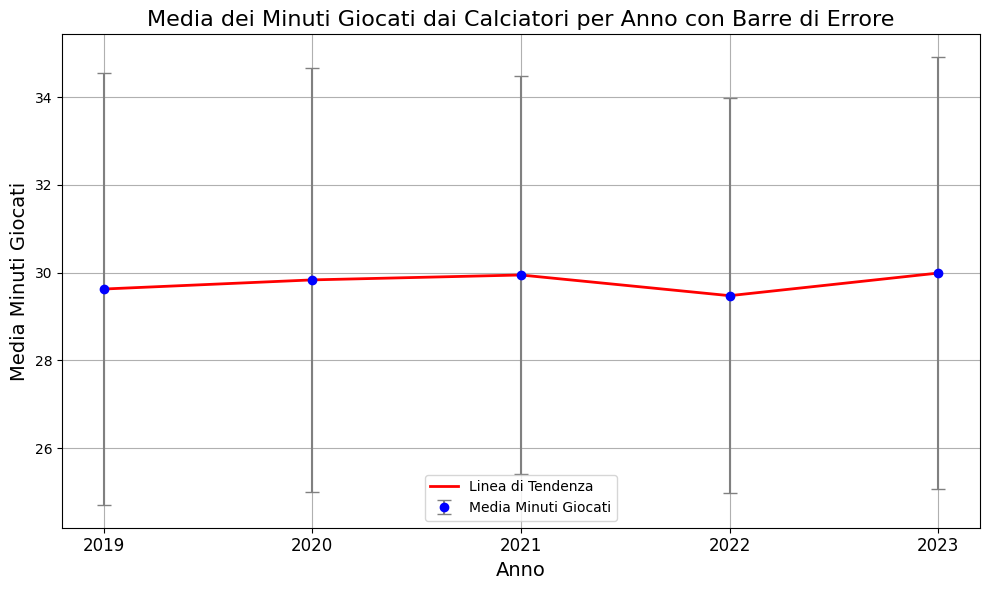

In [27]:
statistiche_minuti_per_anno = {}

# Ciclo sui file per raccogliere i dati
for file in files:
    data = pd.read_excel(file)
    valori = data['MP']  
    
    # Filtraggio i dati per includere solo i calciatori con più di 20 minuti giocati
    valori_filtrati = valori[valori > 20]
    
    # Calcolo della media e della deviazione standard dei minuti giocati per l'anno corrente
    media_valori_filtrati = valori_filtrati.mean()
    deviazione_standard = valori_filtrati.std()
    
    # Aggiunta dei valori al dizionario
    year = year_mapping[file]
    statistiche_minuti_per_anno[year] = (media_valori_filtrati, deviazione_standard)

# Creazione di un DataFrame per le statistiche dei minuti giocati per anno
df_statistiche = pd.DataFrame( [(year, stat[0], stat[1]) for year, stat in statistiche_minuti_per_anno.items()], columns=['Anno', 'Media Minuti', 'Deviazione Standard'])

# Ordinamento del DataFrame per anno
df_statistiche = df_statistiche.sort_values('Anno')

plt.figure(figsize=(10, 6))

# Errorbar

plt.errorbar( df_statistiche['Anno'], df_statistiche['Media Minuti'], yerr=df_statistiche['Deviazione Standard'], fmt='o', ecolor='gray', capsize=5, color='blue', label='Media Minuti Giocati')
plt.plot(df_statistiche['Anno'], df_statistiche['Media Minuti'], color='red', linestyle='-', linewidth=2, label='Linea di Tendenza')

# Personalizzazione i tick dell'asse x per mostrare solo gli anni
plt.xticks(df_statistiche['Anno'], fontsize=12)

plt.xlabel('Anno', fontsize=14)
plt.ylabel('Media Minuti Giocati', fontsize=14)
plt.title('Media dei Minuti Giocati dai Calciatori per Anno con Barre di Errore', fontsize=16)

plt.grid(True)

plt.legend()

plt.tight_layout()

plt.show()


In questi grafici vediamo la distribuzione dei minuti giocati diviso 90 dagli attaccanti. In altre parole calcoliamo quante partite complete vengono giocate dagli attaccanti. Abbiamo messo un bound inferiore di 20 minuti giocati per evitare che i dati vengano sfalsati da giocatori con pochi minuti giocati. Vediamo che la distribuzione e la media rimane più o meno la stessa nel corso degli anni. La media addirittura oscilla fra 29.42 e 29.98. Dal grafico si ottiene anche un insolito calo dei minuti giocati nel 2022, probabilmente dovuto dalla presenza di numerose squadre con un assetto ad attaccanti a 2 e non a 3 come negli anni precedenti. Considerando la possibilità di 5 sostituzioni per partita per ogni squadra, si giustificano gli scarti del grafico dal fatto che l'impiego dei giocatori subentrati dalla panchina, i quali hanno un minutaggio per partita considerevolmente minore rispetto ai giocatori titolari.

Aggiungiamo una cella di codice che stampa gli istogrammi di tutte le statistiche di tutti 5 gli anni. In modo da poterli 
analizzare singolarmente in seguito, senza appesantire il codice con tutti i grafici.

In [82]:
import importlib
import funzioni
importlib.reload(funzioni)

<module 'funzioni' from 'c:\\Users\\milan\\OneDrive\\Desktop\\git shared\\Pytone\\ATTACCANTI\\funzioni.py'>

In [58]:
from funzioni import freedman_diaconis_bins
for file in files:
    data = pd.read_excel(file)

    # Selezione solo delle colonne numeriche
    numeric_data = data.select_dtypes(include=[np.number])

    # Creazione di istogrammi per ogni colonna numerica
    for column in numeric_data.columns:
        col_data = numeric_data[column].dropna()  

        if col_data.nunique() <= 1:
            continue

        # Calcolo dei bin
        bins = freedman_diaconis_bins(col_data)

        # Istogramma
        plt.figure(figsize=(10, 6))
        plt.hist(col_data, bins=bins, color='k', edgecolor='r', label='Dati')

        plt.title(f'Istogramma della colonna: {column}')
        plt.xlabel(column)
        plt.ylabel('Numero di giocatori')
        #plt.show()
        plt.close()
        # Calcolo della media e sua stampa a video
        #media = col_data.mean()
        #print(f"La media di {column} per l'anno {year_mapping[file]} è: {media:.2f}")


Creiamo una funzione che, dati in input la statistica e l'anno desiderato, restituisce l'istogramma di quella statistica
relativa a quell'anno

Con questa funzione possiamo richiamare dei grafici specifici e analizzarli se ci interessa.

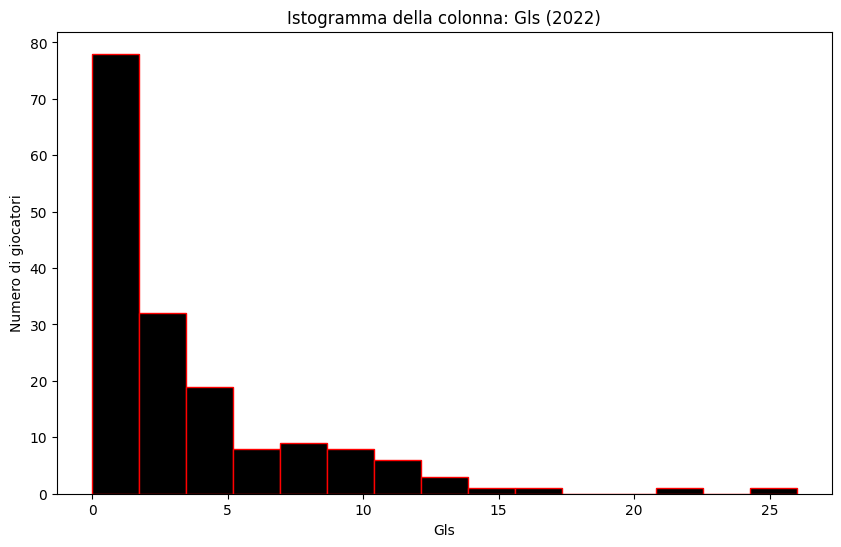

La media di Gls per l'anno 2022 è: 3.41
Il giocatore che ha registrato il maggior numero di Gls è Victor Osimhen con 26.00.


In [59]:
# Dizionario riportato nuovamente nel codice poichè quest'ultimo si confonde nel richiamo della variabile 'anno'. Ciò va a sistemare efficacemente l'errore
year_mapping = {
    2023: 'attaccanti_23.xlsx',
    2022: 'attaccanti_22.xlsx',
    2021: 'attaccanti_21.xlsx',
    2020: 'attaccanti_20.xlsx',
    2019: 'attaccanti_19.xlsx',
}

# Viene richiamata la funzione che permette la stampa a video di un grafico in particolare scelto da utente
from funzioni import istogramma
statistica = 'Gls'
anno = 2022
istogramma(statistica, anno,year_mapping)

CORRELAZIONI

INTRODUZIONE

Il calcio moderno è diventato molto caro, sopratutto il reparto di attacco. Le società chiedono tantissimi soldi per un giocatore "solamente" perchè ha realizzato molti Gol o Assist nella stagione precedente. Non tutte le squadre, però, hanno una disponibilità economica elevata per comprare un attaccante già affermato. La nostra tesi è che esistano delle correlazioni, fra le statistiche sopracitate e le altre di gioco, che una squadra può andare a studiare per stimare il numero di Gol e Assist che può realizzare un attaccante. In questo modo una società non sarà costretta ad affidarsi al numero di Gol ed Assist e potrà comprare giocatori altrettanto validi ad un prezzo minore, risparmiando soldi.

DATA CLEANING

Prima di procedere con l'analisi bisogna fare un processo di 'data cleaning' ovvero una pulizia del dataframe, aggiungendo colonne che possono essere utili oppure togliendone altre che non vogliamo prendere in considerazione.

Eliminiamo cartellini gialli e rossi collezionati dai giocatori, in quanto rappresentano la disciplina di questi e non le loro capacità balistiche. Dopodiche eliminiamo le colonne relative ai calci piazzati in quanto rigori e punizioni hanno i propri specialisti scelti dall'allenatore, non sarebbe quindi equo considerare una statistica alla quale la maggior parte dei giocatori non prendono neanche parte.

Ovviamente scartiamo le celle relative al Nome del giocatore, la Squadra per cui gioca e la sua Nazionalità. Subito dopo togliamo quelle colonne che rappresentano "operazioni" fra altre statistiche, come ad esempio somme fra due dati, percentuali o rapporti, in quanto non sono statistiche di gioco (realizzate sul campo dal giocatore) ma create ad hoc per altri tipi di analisi non inerenti al nostro.

Queste statistiche non verranno mai considerate in questa parte del progetto.

Suddivideremo le statistiche del database in 4 categorie e le analizzeremo una ad una.

1) STATISTICHE DI IMPIEGO

La prima categoria riguarda le statistiche non di campo, quelle relative ad età, minutaggio e partite giocate

In [83]:
#Crea 5 matrici colorate in cui ogni quadratino rappresenta l'indice di 
# correlazione fra le statistiche per annata

correlations = []
years = []

colonne_da_eliminare = ['Player', 'Nation', 'Pos', 'Squad','G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'PrgP', 'PrgR', 'Sh', 'SoT', 'SoT%',
       'G/Sh', 'G/SoT', 'Dist', 'FK', 'G-xG', 'Cmp', 'Att', 'Cmp%', 'xA', 'KP',
       'PPA', 'CrsPA', 'SCA', 'GCA', 'Tkl', 'TklW', 'Mid 3rd', 'Att 3rd',
       'Touches', 'Mid 3rd.1', 'Att 3rd.1', 'Att.1', 'Succ', 'Succ%',
       'Carries', 'TotDist', '2CrdY', 'Fld', 'Off', 'Crs', 'Won', 'Lost',
       'Won%']

for file in files:
    
    data_frame = pd.read_excel(file)

    # Uso .drop per rimuovere dal data frame quelle statistiche che non voglio usare in questa analisi
    data_frame.drop(columns=colonne_da_eliminare, inplace=True) 

    corr_matrix = data_frame.corr()  # Calcolo la matrice di correlazione

    year = year_mapping[file]  # Ottengo l'anno dal file usando il mapping
    years.append(year)

    fig = px.imshow(corr_matrix, title=f"Matrice di Correlazione - Anno {year}", zmin = -1, zmax = 1)
    # Ottengo in output il grafico di correlazione

    fig.show()

# Inserisco questa riga di codice in modo da poter visualizzare le colonne usate per l'analisi
print(f'Le colonne usate per questa analisi sono {list(data_frame.columns)}')

Le colonne usate per questa analisi sono ['Age', 'MP', 'Starts', 'Min', 'Gls', 'Ast']


Il codice stampa delle matrici interattive quadrate simmetriche dove ogni cella è colorata in base all'indice di correlazione delle statistiche scritte sulla riga e colonna corrispondente. Ovviamente la diagonale ha tutti i valori uguali ad uno in quanto indica la correlazione di una statistica con se stessa.
Diciamo che è interattiva in quanto mettendo il cursore su un quadrato vengono indicate le statistiche e l'indice fra di loro.
Sulla destra è riportata una barra che fa da legenda, con la quale si può associare al colore il valore dell'indice, vengono impostati estremi fissi e non variabili durante tutte l'analisi in modo che i colori possano aiutarci in una fase preliminare dell'analisi.

L'indice di correlazione è un numero compreso tra -1 e 1 che indica la relazione fra due variabili. Un indice di correlazione positivo indica che all'aumentare di una statistica anche l'altra lo fa. Mentre quello negativo indica che all'aumentare di una l'altra diminuisce. Più questo valore è vicino all'uno, in modulo, più la relazione è forte, più ci si avvicina allo zero più è debole

A noi importa analizzare gli indici delle statistiche con Gol ed Assist, quindi guardiamo le ultime due righe (colonne). 
Con la matrice possiamo farci un'idea preliminare, grazie ai colori, dell'indice di correlazione fra le statistiche.

In [85]:
# Creo una funzione che restituisce l'elenco degli indci di correlazione di una statistica con le altre anno per anno

def correlazioni_annuali(stat):
    for file in files:
        year = year_mapping[file]
        data_frame = pd.read_excel(file)  

        data_frame.drop(columns=colonne_da_eliminare, inplace=True)

        corr_matrix = data_frame.corr()

        if stat in corr_matrix.columns:
            sorted_corr = corr_matrix[stat].sort_values(ascending=False)

            print(f"Anno {year}: Le correlazioni per {stat} sono:\n{sorted_corr}\n")
        else:
            print(f"La statistica {stat} non è presente nel dataset dell'anno {year}.")
        
# Creo una seconda funzione che mi dice l'indice di correlazione di due statistiche specifiche
# ed il cambiamento di questo nel corso delle stagioni

def correlazione(stat1,stat2):
 correlations = []

 for file in files:
    
    data_frame = pd.read_excel(file)

    data_frame.drop(columns=colonne_da_eliminare, inplace=True)

    corr_matrix = data_frame.corr()

    year = year_mapping[file]

    # Verifica se entrambe le statistiche esistono nella matrice di correlazione
    if stat1 in corr_matrix.columns and stat2 in corr_matrix.columns:
        correlation_value = corr_matrix.loc[stat1, stat2]
        correlations.append((year, correlation_value))
        print(f"Anno {year}: Indice {correlation_value}")
    else:
        correlations.append((year, None))

# Creazione del DataFrame per il grafico
 if stat1 in corr_matrix.columns and stat2 in corr_matrix.columns:
    correlation_df = pd.DataFrame(correlations, columns=['Anno', 'Correlazione'])
    
    # Crea il grafico dell'andamento della correlazione nel tempo
    fig = px.line(correlation_df, x='Anno', y='Correlazione', title=f"Correlazione tra {stat1} e {stat2}", markers=True)
    fig.update_xaxes(dtick=1)
    fig.update_yaxes(range = [-1,1], dtick = 0.10)
    fig.show()
    print(f"Il massimo valore dell'indice fra {stat1} e {stat2} è {correlation_df['Correlazione'].max()} il valore minimo è {correlation_df['Correlazione'].min()}")
 else:
    print("Nessun grafico disponibile: non sono state calcolate correlazioni valide. Controlla l'input")

Ci aiutiamo con delle funzioni per plottare l'andamento di questi indici negli anni considerati.

In [86]:
for column in data_frame.columns:
    if column not in ['Gls','Ast']:
     correlazione('Gls',column)

Anno 2023: Indice 0.1977745624104004
Anno 2022: Indice 0.18653195401367714
Anno 2021: Indice 0.23137810647957016
Anno 2020: Indice 0.2749623918341457
Anno 2019: Indice 0.3391535614268804


Il massimo valore dell'indice fra Gls e Age è 0.3391535614268804 il valore minimo è 0.18653195401367714
Anno 2023: Indice 0.6592999001083631
Anno 2022: Indice 0.6080390010343009
Anno 2021: Indice 0.6966012657586189
Anno 2020: Indice 0.654211001447705
Anno 2019: Indice 0.7013247153283294


Il massimo valore dell'indice fra Gls e MP è 0.7013247153283294 il valore minimo è 0.6080390010343009
Anno 2023: Indice 0.7751304973685476
Anno 2022: Indice 0.7163914853006507
Anno 2021: Indice 0.8156719737976
Anno 2020: Indice 0.7681195929328011
Anno 2019: Indice 0.7671837420769719


Il massimo valore dell'indice fra Gls e Starts è 0.8156719737976 il valore minimo è 0.7163914853006507
Anno 2023: Indice -0.26161596846102375
Anno 2022: Indice -0.2916629122114284
Anno 2021: Indice -0.2853495824722596
Anno 2020: Indice -0.25828516944679036
Anno 2019: Indice -0.31365277248145657


Il massimo valore dell'indice fra Gls e Min è -0.25828516944679036 il valore minimo è -0.31365277248145657


Notiamo che l'unica coppia che presenta massimo e minimo negativi è Gls e Min si presenta quindi una anticorrelazione. Per le altre 3 coppie si ha correlazione diretta in quanto massimo e minimo sono entrambi positivi.

Ragionando in valore assoluto, la coppia che risulta avere la correlazione più debole è Gls e Age nel 2020. Mentre quella più forte è Gls e Starts nel 2021.

In [ ]:
for column in data_frame.columns:
    if column not in ['Gls','Ast']:
     correlazione('Ast',column)

Anche in questo caso si presenta anticorrelazione con i minuti giocati, infatti anche qui il range è interamente a valori negativi. Tutte le altre hanno intervallo con massimo e minimo positivi e quindi correlazione diretta.

Passando al valore assoluto la coppia con la correlazione più debole è Ast e Min nel 2021. Quella più forte ad 1 è Ast e Starts nel 2020.

2) STATISTICHE DI OPPOSIZIONE

In questa parte ci occupiamo di analizzare le statistiche di opposizione, ovvero quelle che il riguardano il comportamento del giocatore quando è messo a confronto con un avversario. Analizzeremo dati come dribbling, contrasti e conduzioni palla. 

In questa parte son presenti statistiche sulla parte di campo in cui vengono registrati determinati dati. Le analizziamo separatamente in quanto vogliamo capire se c'è un impatto diverso legato all'area di campo in cui vengono registrati.

In [71]:
correlations = []
years = []

colonne_da_eliminare = ['Player', 'Nation', 'Pos', 'Squad','Age', 'MP', 'Starts', 'Min', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'PrgP', 'PrgR', 'Sh', 'SoT', 'SoT%',
       'G/Sh', 'G/SoT', 'Dist', 'FK', 'G-xG', 'Cmp', 'Att', 'Cmp%', 'xA', 'KP',
       'PPA', 'CrsPA', 'SCA', 'GCA', 'Succ%','2CrdY', 'Off', 'Crs','Won%']

for file in files:
    
    data_frame = pd.read_excel(file)
    data_frame.drop(columns=colonne_da_eliminare, inplace=True) 

    corr_matrix = data_frame.corr()

    year = year_mapping[file] 
    years.append(year)

    fig = px.imshow(corr_matrix, title=f"Matrice di Correlazione - Anno {year}", zmin = -1, zmax = 1)
    fig.show()
print(f'Le colonne usate per questa analisi sono {list(data_frame.columns)}')

Le colonne usate per questa analisi sono ['Gls', 'Ast', 'Tkl', 'TklW', 'Mid 3rd', 'Att 3rd', 'Touches', 'Mid 3rd.1', 'Att 3rd.1', 'Att.1', 'Succ', 'Carries', 'TotDist', 'Fld', 'Won', 'Lost']


Visivamente possiamo notare come in questo blocco di statistiche gli indici siano più alti rispetto a quello precedente, essendo la griglia composta da colori più caldi. Quindi ci aspettiamo che i range di correlazione siano tutti positivi.

In [72]:
for column in ['Mid 3rd', 'Att 3rd', 'Mid 3rd.1', 'Att 3rd.1']:
    correlazione('Gls',column)

NameError: name 'colonne_da_eliminare' is not defined

Le prime due coppie sono relative ai contrasti, nella parte centrale di campo e quella offensiva. La seconda invece tratta i dribbling, anche qui divisi in parte centrale e offensiva. Per entrambe le categorie notiamo che gli intervalli degli indici sono più elevati per la parte offensiva. Quindi possiamo concludere che la parte di campo in cui vengono fatti dribbling e contrasti ha effettivamente un impatto sui Gol.

In [ ]:
for column in ['Mid 3rd', 'Att 3rd', 'Mid 3rd.1', 'Att 3rd.1']:
    correlazione('Ast',column)

Vediamo che i risultati sono simili a prima quindi il discorso è il medesimo che per i gol. Realizzare dribbling e contrasti nella parte offensiva di campo ha un impatto maggiore sugli assist piuttosto che farli a centrocampo.

In [ ]:
for column in data_frame.columns:
    if column not in ['Gls','Ast','Mid 3rd', 'Att 3rd', 'Mid 3rd.1', 'Att 3rd.1']:
     correlazione('Gls',column)

Vediamo che tutti i minimi sono positivi quindi siamo in presenza solamente di correlazioni dirette.
La coppia con corelazione più debole è Gls e TklW nel 2020 . Quella più forte è Gls e Touches nel 2023.

In [ ]:
for column in data_frame.columns:
    if column not in ['Gls','Ast','Mid 3rd', 'Att 3rd', 'Mid 3rd.1', 'Att 3rd.1']:
     correlazione('Ast',column)

Anche qui siamo solamente in presenza di correlazioni dirette. Rispetto ai gol si hanno correlazioni più forti, come in Carries che ha registrato la correlazione più forte con Ast nel 2021, ma anche alcune più deboli come quella di Won che ha registrato l'indice di correlazione con Ast più basso nel 2022.

3) STATISTICHE DI GIOCO

In questa parte andiamo ad analizzare le statistiche di creazione offensiva, quelle relative ai passaggi ai tiri e alla creazione di chance da gol o di tiro

In [65]:
correlations = []
years = []

colonne_da_eliminare = ['Player', 'Nation', 'Pos', 'Squad','Age', 'MP', 'Starts', 'Min', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'SoT%', 'xG', 'xA',
       'G/Sh', 'G/SoT', 'FK', 'G-xG','Cmp%','Tkl', 'TklW', 'Mid 3rd', 'Att 3rd',
       'Touches', 'Mid 3rd.1', 'Att 3rd.1', 'Att.1', 'Succ', 'Succ%',
       'Carries', 'TotDist', '2CrdY', 'Fld', 'Won', 'Lost',
       'Won%']

for file in files:
    
    data_frame = pd.read_excel(file)
    data_frame.drop(columns=colonne_da_eliminare, inplace=True) 

    corr_matrix = data_frame.corr()

    year = year_mapping[file] 
    years.append(year)

    fig = px.imshow(corr_matrix, title=f"Matrice di Correlazione - Anno {year}", zmin = -1, zmax = 1)
    fig.show()
    
print(f'Le colonne usate per questa analisi sono {list(data_frame.columns)}')

KeyError: 'attaccanti_23.xlsx'

In queste matrici vediamo colori molto caldi, quindi ci aspettiamo solo correlazioni dirette. Ad eccezione per una colonna con correlazione molto debole vicinissima allo zero sia per Gol che per Assist relativa a Dist, ovvero la distanza media di tiro. Risultato prevedibile. Analizziamola a parte per dimostrare ciò che abbiamo appena detto.

In [66]:
for column in ['Gls','Ast']:
    correlazione('Dist',column)

NameError: name 'colonne_da_eliminare' is not defined

Fra Dist e Gol l'intervallo degli indici di correlazione è negativo siamo in presenza di anticorrelazione molto debole.
Con gli Ast l'intervallo comprende valori negativi e positivi tutti vicini allo zero correlazione quindi, anche in questo caso, molto debole.

In [ ]:
for column in data_frame.columns:
    if column not in ['Gls','Ast','Dist']:
     correlazione('Gls',column)

Come anticipato, siccome tutti i minimi sono positivi, siamo in presenza di correlazioni dirette più o meno forti. La più forte è Gls e SoT nel 2021, il range è interamente molto vicino all'uno quindi siamo in presenza di una correlazione molto forte. Al contrario la correlazione è con CrsPA registrato nel 2019.

In [ ]:
for column in data_frame.columns:
    if column not in ['Gls','Ast','Dist']:
     correlazione('Ast',column)

Siamo in presenza di sole correlazioni dirette. Qua per gli assist la correlazione più forte è con GCA registrata nel 2021. Mentre la più debole è con Off registrato nel 2019.

4) GOL E ASSIST ATTESI

In questa parte finale di analisi ci concentriamo sul concetto specifico di Gol ed Assist attesi

I concetti di gol attesi (xG) e assist attesi (xA) sono metriche avanzate utilizzate nel calcio per misurare la qualità delle azioni da gol e degli assist, tenendo conto di fattori che influenzano la probabilità che si verifichi un gol o un assist. Il valore è compreso tra 0 e 1, dove un valore di 1 indica un evento che ha quasi certezza di verificarsi. mentre 0.1 rappresenta un tiro (ad esempio) molto difficile con poca probabilità di realizzazione.
Nello specifico, xG prende in considerazione aspetti come:
- Posizione del tiro: più vicino alla porta, più alta è la probabilità di segnare.
- Angolo di tiro: tiri da angoli difficili (ad esempio, tiri da fuori area o angoli stretti) hanno una probabilità inferiore di andare in gol.
- Posizione del portiere: se il portiere è fuori posizione o se c'è un errore difensivo, la probabilità di segnare aumenta.

Come per l'xG, anche l'xA si basa su vari fattori che influenzano la probabilità di trasformare un passaggio in un gol, come:
- Tipo di passaggio: passaggi facili da ricevere e controllare (come palloni rasoterra diretti) hanno una probabilità maggiore di diventare assist.
- Distanza dal gol: passaggi effettuati vicino alla porta o da posizioni centrali hanno un xA più alto.
- Posizione del ricevente: se il destinatario del passaggio è in una buona posizione per segnare, l'assist atteso sarà più alto.

In [80]:
colonne_da_eliminare = ['Player', 'Nation', 'Pos', 'Squad','Age', 'MP', 'Starts', 'Min', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'SoT%',
       'G/Sh', 'G/SoT', 'FK', 'G-xG','Cmp%','Tkl', 'TklW', 'Mid 3rd', 'Att 3rd',
       'Touches', 'Mid 3rd.1', 'Att 3rd.1', 'Att.1', 'Succ', 'Succ%',
       'Carries', 'TotDist', '2CrdY', 'Fld','Won', 'Lost',
       'Won%']

In [81]:
stat1 = 'Gls'
stat2 = 'xG'
correlazione(stat1,stat2)

ValueError: could not convert string to float: 'Tammy Abraham'

Come potevamo immaginarci dalla spiegazione precedente il range è estremamente vicino ad 1, quindi la correlazione è molto forte fra queste due statistiche. Il risultato è molto comprensibile in quanto dietro a questi dati ci sono studi molto profondi e complessi realizzati anche con l'aiuto di intelligenze artificiali e database pienissimi di dati di miliardi di giocatori presi in diverse annate.

In [ ]:
stat1 = 'Ast'
stat2 = 'xA'
correlazione(stat1,stat2)

La correlazione anche in questo caso è forte. Lo è meno di quanto lo sono gli xG con i Gol in quanto per gli assist c'è la variabile relativa al compagno che può non riuscire a concretizzare un ottimo passaggio.

CONCLUSIONE

La ricerca conferma la nostra tesi. Esistono statistiche che presentano correlazioni forti con Gol ed Assist. Inoltre per ogni coppia di statistiche la differenza fra il minimo ed il massimo valore che assume l'indice mostra una costanza nella correlazione delle statistiche nel corso delle stagioni.

RETI NEURALI

Grazie all'analisi di correlazione abbiamo capito quali statistiche sono correlate con i dati di Gol ed Assist. Daremo quindi in input alla rete neurale quelle statistiche e chiederemo in output, appunto, Gol ed Assist.


Nelle prossime celle andremo ad impostare la rete neurale, importando i file ed addestrandola con i file di input. 
Andiamo a fare prima i gol e nella cella seguente la rete per gli assist

In [ ]:
f1 = "attaccanti_19.xlsx"
f2 = "attaccanti_20.xlsx"
f3 = "attaccanti_21.xlsx"
f4 = "attaccanti_22.xlsx"
f5 = "attaccanti_23.xlsx"

colonne_da_eliminare = ['Player', 'Nation', 'Pos', 'Squad','Ast','G+A', 'G-PK', 'PK','PKatt', 'CrdY', 'CrdR', 'SoT%','G/Sh',
'G/SoT', 'FK', 'G-xG', 'Cmp%', 'Succ%','2CrdY', 'Won%']

#correlazioni_annuali('Gls')  # scopriamo l'ordine di correlazione per l'anno che ci interessa
colonne_ordinate = ["Gls", "xG", "SoT", "Sh", "GCA", "Starts", "PrgR", "Att 3rd.1", "SCA", "Touches", "Mid 3rd.1", "Carries", "KP", "Att",
                     "MP", "Cmp", "Fld", "xA", "PrgP", "Off", "TotDist", "Att.1", "PPA", "Att 3rd", "Succ", "Lost", "Won", 
                     "Tkl", "TklW", "Mid 3rd", "Crs", "CrsPA", "Age", "Dist", "Min"]
# Unisco i file Excel
df1 = pd.read_excel(f1)
df2 = pd.read_excel(f2).iloc[1:].reset_index(drop=True)
df3 = pd.read_excel(f3).iloc[1:].reset_index(drop=True)
df4 = pd.read_excel(f4).iloc[1:].reset_index(drop=True)
df_unito = pd.concat([df1, df2, df3, df4], ignore_index=True)
df_unito = df_unito[colonne_ordinate]

df5 = pd.read_excel(f5)
df5 = df5.drop(columns=colonne_da_eliminare, errors='ignore')
df5 = df5[colonne_ordinate]

In [ ]:
# Pre-elaborazione
scaler = StandardScaler()

# Variabili per risultati complessivi

risultati = []
errori_training = []
errori_predizione = []
num_colonne_usate = []
# Loop su colonne per il training
for num_col in range(1, df_unito.shape[1] + 1):  # Da 5 colonne in poi    
    print(f"Training usando le prime {num_col} colonne.")
        # Separa input e output
    X = df_unito.iloc[:, 1:]  # Colonne di input (da 2 alla num_col)    
    y = df_unito.iloc[:, :1]        # Le prime due colonne come output (Gls, Ast)
        # Normalizza le colonne di input
    X_scaled = scaler.fit_transform(X)    
    # Prepara i dati per il training    
    X_train, y_train = X_scaled, y
        # Costruzione della rete neurale
    model = tf.keras.Sequential([tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'), tf.keras.layers.Dense(y_train.shape[1])
    ])    
    # Compilazione del modello
    model.compile(optimizer='adam', loss='mean_squared_error')    
    # Addestramento del modello    
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
        # Calcola l'errore sui dati di training
    training_predictions = model.predict(X_train, verbose=0)   
    mse_training = mean_squared_error(y_train, training_predictions)
    errori_training.append(mse_training)    
    # Carica e pre-processa i dati nuovi    
    X_new = df5[X.columns]
    X_new_scaled = scaler.transform(X_new)    
    # Usa il modello per fare previsioni    
    y_pred = model.predict(X_new_scaled, verbose=0)
        # Imposta a 0 tutti i valori predetti che sono minori di 0
    y_pred = np.clip(y_pred, 0, None)    
    # Calcola l'errore sui dati di predizione    
    y_actual = df5['Gls'].values  # Goal e assist effettivi
    mse_prediction = mean_squared_error(y_actual, y_pred)    
    errori_predizione.append(mse_prediction)
        # Salva il numero di colonne utilizzate
    num_colonne_usate.append(num_col)    
    # Aggiungi le previsioni al DataFrame    
    df_new = df5.copy()
    df_new['Pred_Gls'] = y_pred[:, 0]
        # Calcola le somme
    somma_goal_Attesi = df_new['Pred_Gls'].sum()    
    somma_goal_effettiva = df_new['Gls'].sum()    
    # Stampa i risultati per ogni configurazione    print(f"Con {num_col} colonne:")
    print(f"Errore Training (MSE): {mse_training}")    
    print(f"Errore Predizione (MSE): {mse_prediction}")
# Plot degli errori
plt.figure(figsize=(10, 6))
plt.plot(num_colonne_usate, errori_training, label='Errore Training', marker='o')
plt.plot(num_colonne_usate, errori_predizione, label='Errore Predizione', marker='s')
plt.xlabel('Numero di Colonne Utilizzate')
plt.ylabel('Errore Medio Quadratico (MSE)')
plt.title('Andamento degli Errori in base al Numero di Colonne Utilizzate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calcola separatamente la somma delle previsioni per Gls e Ast
somma_goal_attesi = df_new['Pred_Gls'].sum()
somma_assist_attesi = df_new['Pred_Ast'].sum()

# Calcola separatamente la somma effettiva dei goal e assist nei dati originali
somma_goal = df_new['Gls'].sum()
somma_assist = df_new['Ast'].sum()
# Risultati dei gol
print(f"La somma dei goal effettivi è {somma_goal}")
print(f"La somma dei goal ottenuti dalla rete neurale è {somma_goal_attesi}")

# Risultati degli assist

print(f"La somma degli assist effettivi è {somma_assist}")
print(f"La somma degli assist ottenuti dalla rete neurale è {somma_assist_attesi}")


In [ ]:
# Errore

diff_gol = abs(somma_goal - somma_goal_attesi)
diff_ast = abs(somma_assist - somma_assist_attesi)

# Trovo l'errore medio dividendo per il numero di giocatori 

avg_err_gol = diff_gol/194  
avg_err_ast = diff_ast/194

print(f"La differenza fra la somma effettiva e quella della rete neurale è di {diff_gol} Gol")
print(f"La differenza fra la somma effettiva e quella della rete neurale è di {diff_ast} Assist")
print(f"L'errore medio per i gol è {avg_err_gol} per giocatore")
print(f"L'errore medio per gli assist è {avg_err_ast} per giocatore")


Aumentando il numero delle epoche ovviamente la differenza fra la previsione della rete neurale e la somma effettiva delle statistiche richieste si assottiglia notevolmente. Il processo richiede più tempo ma restituisce risultati più precisi.